In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

## Data Collection

### df_products Data Description

`df_products`, contains descriptive information about individual products listed on Amazon. Each row represents a unique product identified by its `id`. The columns provide various attributes of these products, which can be used to understand their characteristics and popularity.

Here's a breakdown of each column:

*   **`id`**:
    *   **Data Type**: Integer
    *   **Description**: Unique identifier for each product. This ID is used to link products in the `df_copurchase` DataFrame, acting as the node identifier in the product network.
    *   **Example**: `1`, `2`, `3`, `4`, `5`, ...

*   **`title`**:
    *   **Data Type**: String (Text)
    *   **Description**: The name or title of the product. This provides a textual description of what the product is.
    *   **Example**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames", etc.

*   **`group`**:
    *   **Data Type**: String (Categorical)
    *   **Description**:  The category or group the product belongs to. This helps in understanding the product type (e.g., Book, Music, DVD, etc.).
    *   **Example**: "Book"

*   **`salesrank`**:
    *   **Data Type**: Float
    *   **Description**: Amazon sales rank of the product. A lower `salesrank` indicates higher sales and popularity. This is a common metric to gauge how well a product is selling on Amazon.
    *   **Example**: `396585.0`, `168596.0`, `1270652.0`, etc.

*   **`review_cnt`**:
    *   **Data Type**: Integer
    *   **Description**:  The number of customer reviews received for the product. A higher `review_cnt` can indicate greater product visibility, popularity, or customer engagement.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`downloads`**:
    *   **Data Type**: Integer
    *   **Description**: The number of downloads associated with the product.  The exact meaning might depend on the dataset source. It could represent digital product downloads, or potentially another engagement metric.  In the context of "Book" products in the example, it might represent sample downloads, or perhaps a different type of engagement relevant to the dataset.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`rating`**:
    *   **Data Type**: Float
    *   **Description**: The average customer rating of the product, typically on a scale of 0 to 5 (or similar). This reflects the overall customer satisfaction and perceived quality of the product.
    *   **Example**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`, etc.

In [7]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


## df_copurchase Data Description
`df_copurchase` represents the co-purchasing relationships between products. Each row signifies a directed relationship: if a customer purchased the product in the `Source` column, they were also likely to purchase the product in the `Target` column.

Here's a breakdown of each column:

*   **`Source`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was initially purchased (product ID-X as described in the project description). This column acts as the source node in the co-purchasing graph. It corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `1`, `1`, `1`, `1`, `2`, ...

*   **`Target`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was co-purchased with the 'Source' product (product ID-Y). This column acts as the target node in the co-purchasing graph. It also corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `2`, `4`, `5`, `15`, `11`, ...

In [10]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


## Data Exploration

**Pertanyaan untuk df_products:**
1. Correlation Matrix antara salesrank, review count, download, rating

**Pertanyaan untuk df_copurchase:**
1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.
2. Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)
   * Produk mana yang paling sering menjadi "Source" dalam df_copurchase? Ini mengindikasikan produk mana yang pembeliannya paling sering diikuti dengan pembelian produk lain. Hitung out-degree setiap node (produk).
   * Visualisasikan top produk dengan out-degree tertinggi (misalnya dengan bar chart).
3. Top-5 produk yang paling banyak di co-purchase (target) (in-degree)
   * Produk mana yang paling sering menjadi "Target" dalam df_copurchase? Ini mengindikasikan produk mana yang paling sering dibeli bersamaan dengan produk lain. Hitung in-degree setiap node (produk).
   * Visualisasikan top produk dengan in-degree tertinggi (misalnya dengan bar chart).
4. Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)
   * Contohnya, untuk in-degree, bagaimana distribusinya (node dengan in-degree 0 ada berapa, 1 ada berapa, etc.)
   * Visualisasikan
5. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

**Pertanyaan untuk keduanya:**
1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.
3. Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)
4. Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan
   in-degree dari group B, C, D, dst. ke group A)

---

#### Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)

In [ ]:
# Menghitung jumlah kemunculan setiap produk sebagai 'Source' (out-degree)
top_out_degree = df_copurchase['Source'].value_counts()
top_out_degree

Source
131454    5
166501    5
166487    5
166488    5
166489    5
         ..
44578     1
250624    1
82937     1
208301    1
184560    1
Name: count, Length: 257569, dtype: int64

In [5]:
# Menghitung jumlah kemunculan setiap produk sebagai 'Source' (out-degree)
top_out_degree = df_copurchase['Source'].value_counts().head(5)

# Visualisasi dengan bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_out_degree.index, y=top_out_degree.values, palette="viridis")
plt.xlabel("Product ID")
plt.ylabel("Out-Degree Count")
plt.title("Top-5 Produk dengan Out-Degree Tertinggi (Sebagai Source)")
plt.show()

top_out_degree = df_copurchase['Source'].value_counts().head(10)
top_out_degree

NameError: name 'df_copurchase' is not defined

**Penjelasan**

Grafik di atas menunjukkan Top-5 produk dengan out-degree tertinggi, yaitu **produk yang paling sering muncul sebagai Source dalam hubungan co-purchasing**

Kelima produk teratas memiliki jumlah koneksi (out-degree) sebanyak 5 kali masing-masing, dengan Product IDs :

131454 <br>
166501 <br>
166487 <br>
166488 <br>
166489

#### Top-5 produk yang paling banyak di co-purchase (target) (in-degree)

<ipython-input-11-a548bcad4620>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_in_degree.index, y=top_in_degree.values, palette="viridis")


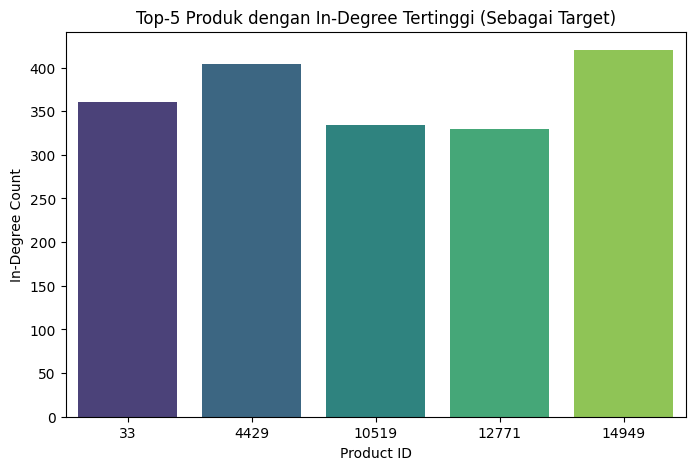

,count
Target,
14949,420
4429,404
33,361
10519,334
12771,330
8,293
297,280
481,275
5737,272


In [11]:
top_in_degree = df_copurchase['Target'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_in_degree.index, y=top_in_degree.values, palette="viridis")
plt.xlabel("Product ID")
plt.ylabel("In-Degree Count")
plt.title("Top-5 Produk dengan In-Degree Tertinggi (Sebagai Target)")
plt.show()

top_in_degree = df_copurchase['Target'].value_counts().head(10)
top_in_degree

**Penjelasan**

Grafik di atas menunjukkan Top-5 produk dengan in-degree tertinggi, yaitu **produk yang paling sering muncul sebagai Source dalam hubungan co-purchasing**

Kelima produk teratas memiliki jumlah koneksi masuk (in-degree) tertinggi:

- `14949` dengan 420 koneksi.
- `4429` dengan 404 koneksi
- `33` denagn 361 koneksi
- `10519` dengan 334 koneksi.
- `12771` dengan 330 koneksi.

#### Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)

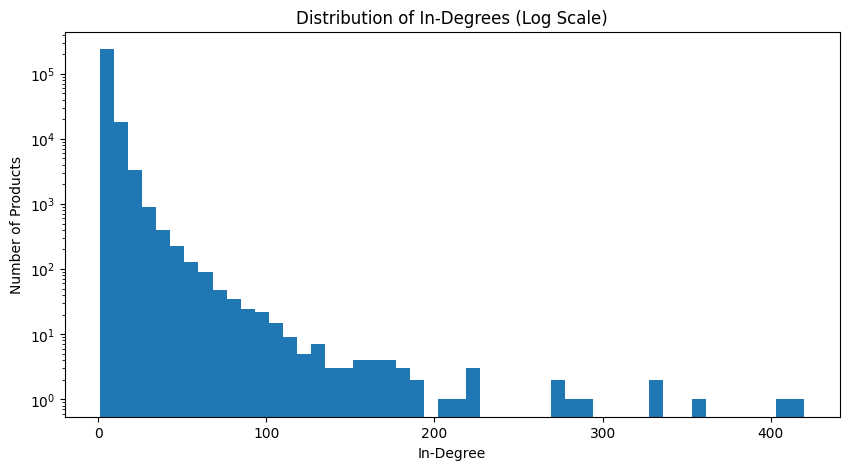

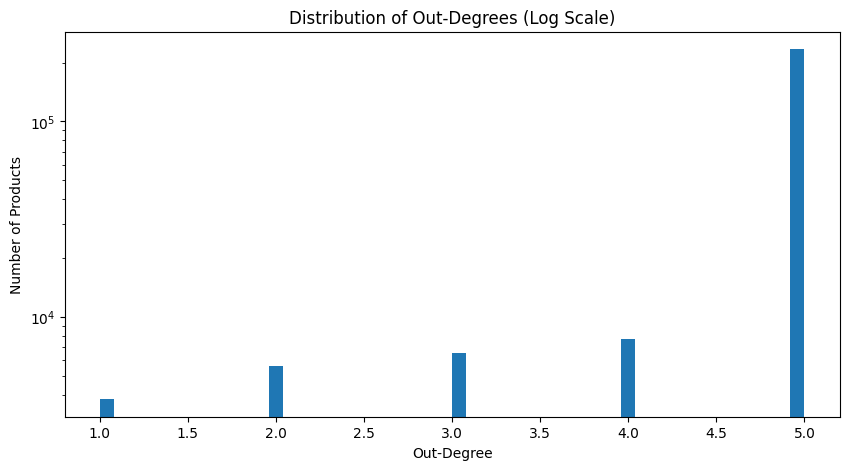

In [12]:
in_degree_counts = df_copurchase['Target'].value_counts()
out_degree_counts = df_copurchase['Source'].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(in_degree_counts.values, bins=50, log=True)
plt.xlabel("In-Degree")
plt.ylabel("Number of Products")
plt.title("Distribution of In-Degrees (Log Scale)")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(out_degree_counts.values, bins=50, log=True)
plt.xlabel("Out-Degree")
plt.ylabel("Number of Products")
plt.title("Distribution of Out-Degrees (Log Scale)")
plt.show()


**Penjelasan**

Grafik tersebut menunjukkan distribusi jumlah *in-degree* dan *out-degree* dari semua produk. Beberapa insight:

- Sebagian besar produk memiliki *in-degree* yang sedikit, yang berarti sebagian besar produk dibeli bersamaan dengan sebagian kecil produk. Ini mungkin bersesuaian untuk barang-barang khusus atau kurang populer yang tidak sering direkomendasikan atau dibeli bersamaan dengan barang-barang lainnya.
- Ada beberapa produk yang memiliki *in-degree* yang tinggi, menggambarkan beberapa produk dibeli bersamaan dengan sesuatu. Ini mungkin bersesuaian dengan produk-produk seperti aksesoris, *add-on* seperti baterai, dan barang borongan seperti buku berseri.
- Setiap produk paling banyak dihubungkan dengan 5 produk lainnya. Ini mungkin suatu batasan yang diterapkan di sistem Amazon.